#### Загрузка набора данных

In [102]:
import pandas as pd

from sklearn import set_config

set_config(transform_output="pandas")

random_state=9

df = pd.read_csv("data/titanic.csv", index_col="PassengerId")

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


#### Разделение набора данных на обучающую и тестовые выборки (80/20) для задачи классификации

Целевой признак -- Survived

In [37]:
from utils import split_stratified_into_train_val_test

X_train, X_val, X_test, y_train, y_val, y_test = split_stratified_into_train_val_test(
    df, stratify_colname="Survived", frac_train=0.80, frac_val=0, frac_test=0.20, random_state=random_state
)

display("X_train", X_train)
display("y_train", y_train)

display("X_test", X_test)
display("y_test", y_test)

'X_train'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
145,0,2,"Andrew, Mr. Edgardo Samuel",male,18.00,0,0,231945,11.5000,NaN,S
206,0,3,"Strom, Miss. Telma Matilda",female,2.00,0,1,347054,10.4625,G6,S
349,1,3,"Coutts, Master. William Loch ""William""",male,3.00,1,1,C.A. 37671,15.9000,NaN,S
329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.00,1,1,363291,20.5250,NaN,S
289,1,2,"Hosono, Mr. Masabumi",male,42.00,0,0,237798,13.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C


'y_train'

,Survived
PassengerId,
145,0
206,0
349,1
329,1
289,1
...,...
756,1
816,0
890,1


'X_test'

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C
791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
509,0,3,"Olsen, Mr. Henry Margido",male,28.0,0,0,C 4001,22.5250,NaN,S
828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
824,1,3,"Moor, Mrs. (Beila)",female,27.0,0,1,392096,12.4750,E121,S
353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
674,1,2,"Wilhelms, Mr. Charles",male,31.0,0,0,244270,13.0000,NaN,S


'y_test'

,Survived
PassengerId,
843,1
791,0
509,0
828,1
414,0
...,...
824,1
353,0
674,1


#### Формирование конвейера для классификации данных

preprocessing_num -- конвейер для обработки числовых данных: заполнение пропущенных значений и стандартизация

preprocessing_cat -- конвейер для обработки категориальных данных: заполнение пропущенных данных и унитарное кодирование

features_preprocessing -- трансформер для предобработки признаков

features_engineering -- трансформер для конструирования признаков

drop_columns -- трансформер для удаления колонок

features_postprocessing -- трансформер для унитарного кодирования новых признаков

pipeline_end -- основной конвейер предобработки данных и конструирования признаков

Конвейер выполняется последовательно.

Трансформер выполняет параллельно для указанного набора колонок.

Документация: 

https://scikit-learn.org/1.5/api/sklearn.pipeline.html

https://scikit-learn.org/1.5/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer

In [38]:
from sklearn.compose import ColumnTransformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

from transformers import TitanicFeatures


columns_to_drop = ["Survived", "Name", "Cabin", "Ticket", "Embarked", "Parch", "Fare"]
num_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype != "object"
]
cat_columns = [
    column
    for column in df.columns
    if column not in columns_to_drop and df[column].dtype == "object"
]

num_imputer = SimpleImputer(strategy="median")
num_scaler = StandardScaler()
preprocessing_num = Pipeline(
    [
        ("imputer", num_imputer),
        ("scaler", num_scaler),
    ]
)

cat_imputer = SimpleImputer(strategy="constant", fill_value="unknown")
cat_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first")
preprocessing_cat = Pipeline(
    [
        ("imputer", cat_imputer),
        ("encoder", cat_encoder),
    ]
)

features_preprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_num", preprocessing_num, num_columns),
        ("prepocessing_cat", preprocessing_cat, cat_columns),
        ("prepocessing_features", cat_imputer, ["Name", "Cabin"]),
    ],
    remainder="passthrough"
)

features_engineering = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("add_features", TitanicFeatures(), ["Name", "Cabin"]),
    ],
    remainder="passthrough",
)

drop_columns = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("drop_columns", "drop", columns_to_drop),
    ],
    remainder="passthrough",
)

features_postprocessing = ColumnTransformer(
    verbose_feature_names_out=False,
    transformers=[
        ("prepocessing_cat", preprocessing_cat, ["Cabin_type"]),
    ],
    remainder="passthrough",
)

pipeline_end = Pipeline(
    [
        ("features_preprocessing", features_preprocessing),
        ("features_engineering", features_engineering),
        ("drop_columns", drop_columns),
        ("features_postprocessing", features_postprocessing),
    ]
)

#### Демонстрация работы конвейера для предобработки данных при классификации

In [39]:
preprocessing_result = pipeline_end.fit_transform(X_train)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

preprocessed_df

,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_u,Is_married,Pclass,Age,SibSp,Sex_male
PassengerId,,,,,,,,,,,,,
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.379423,-0.869506,-0.473465,1.0
206,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.821241,-2.102186,-0.473465,0.0
349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.821241,-2.025143,0.437635,1.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.821241,0.132047,0.437635,0.0
289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.379423,0.979514,-0.473465,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,-0.379423,-2.204652,0.437635,1.0
816,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.580088,-0.099081,-0.473465,1.0
890,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-1.580088,-0.253166,-0.473465,1.0


#### Формирование набора моделей для классификации

logistic -- логистическая регрессия

ridge -- гребневая регрессия

decision_tree -- дерево решений

knn -- k-ближайших соседей

naive_bayes -- наивный Байесовский классификатор

gradient_boosting -- метод градиентного бустинга (набор деревьев решений)

random_forest -- метод случайного леса (набор деревьев решений)

mlp -- многослойный персептрон (нейронная сеть)

Документация: https://scikit-learn.org/1.5/supervised_learning.html

In [40]:
from sklearn import ensemble, linear_model, naive_bayes, neighbors, neural_network, tree

class_models = {
    "logistic": {"model": linear_model.LogisticRegression()},
    # "ridge": {"model": linear_model.RidgeClassifierCV(cv=5, class_weight="balanced")},
    "ridge": {"model": linear_model.LogisticRegression(penalty="l2", class_weight="balanced")},
    "decision_tree": {
        "model": tree.DecisionTreeClassifier(max_depth=7, random_state=random_state)
    },
    "knn": {"model": neighbors.KNeighborsClassifier(n_neighbors=7)},
    "naive_bayes": {"model": naive_bayes.GaussianNB()},
    "gradient_boosting": {
        "model": ensemble.GradientBoostingClassifier(n_estimators=210)
    },
    "random_forest": {
        "model": ensemble.RandomForestClassifier(
            max_depth=11, class_weight="balanced", random_state=random_state
        )
    },
    "mlp": {
        "model": neural_network.MLPClassifier(
            hidden_layer_sizes=(7,),
            max_iter=500,
            early_stopping=True,
            random_state=random_state,
        )
    },
}

#### Обучение моделей на обучающем наборе данных и оценка на тестовом

In [41]:
import numpy as np
from sklearn import metrics

for model_name in class_models.keys():
    print(f"Model: {model_name}")
    model = class_models[model_name]["model"]

    model_pipeline = Pipeline([("pipeline", pipeline_end), ("model", model)])
    model_pipeline = model_pipeline.fit(X_train, y_train.values.ravel())

    y_train_predict = model_pipeline.predict(X_train)
    y_test_probs = model_pipeline.predict_proba(X_test)[:, 1]
    y_test_predict = np.where(y_test_probs > 0.5, 1, 0)

    class_models[model_name]["pipeline"] = model_pipeline
    class_models[model_name]["probs"] = y_test_probs
    class_models[model_name]["preds"] = y_test_predict

    class_models[model_name]["Precision_train"] = metrics.precision_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Precision_test"] = metrics.precision_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Recall_train"] = metrics.recall_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Recall_test"] = metrics.recall_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Accuracy_train"] = metrics.accuracy_score(
        y_train, y_train_predict
    )
    class_models[model_name]["Accuracy_test"] = metrics.accuracy_score(
        y_test, y_test_predict
    )
    class_models[model_name]["ROC_AUC_test"] = metrics.roc_auc_score(
        y_test, y_test_probs
    )
    class_models[model_name]["F1_train"] = metrics.f1_score(y_train, y_train_predict)
    class_models[model_name]["F1_test"] = metrics.f1_score(y_test, y_test_predict)
    class_models[model_name]["MCC_test"] = metrics.matthews_corrcoef(
        y_test, y_test_predict
    )
    class_models[model_name]["Cohen_kappa_test"] = metrics.cohen_kappa_score(
        y_test, y_test_predict
    )
    class_models[model_name]["Confusion_matrix"] = metrics.confusion_matrix(
        y_test, y_test_predict
    )

Model: logistic
Model: ridge
Model: decision_tree
Model: knn
Model: naive_bayes
Model: gradient_boosting
Model: random_forest
Model: mlp


#### Сводная таблица оценок качества для использованных моделей классификации

Документация: https://scikit-learn.org/1.5/modules/model_evaluation.html

Матрица неточностей

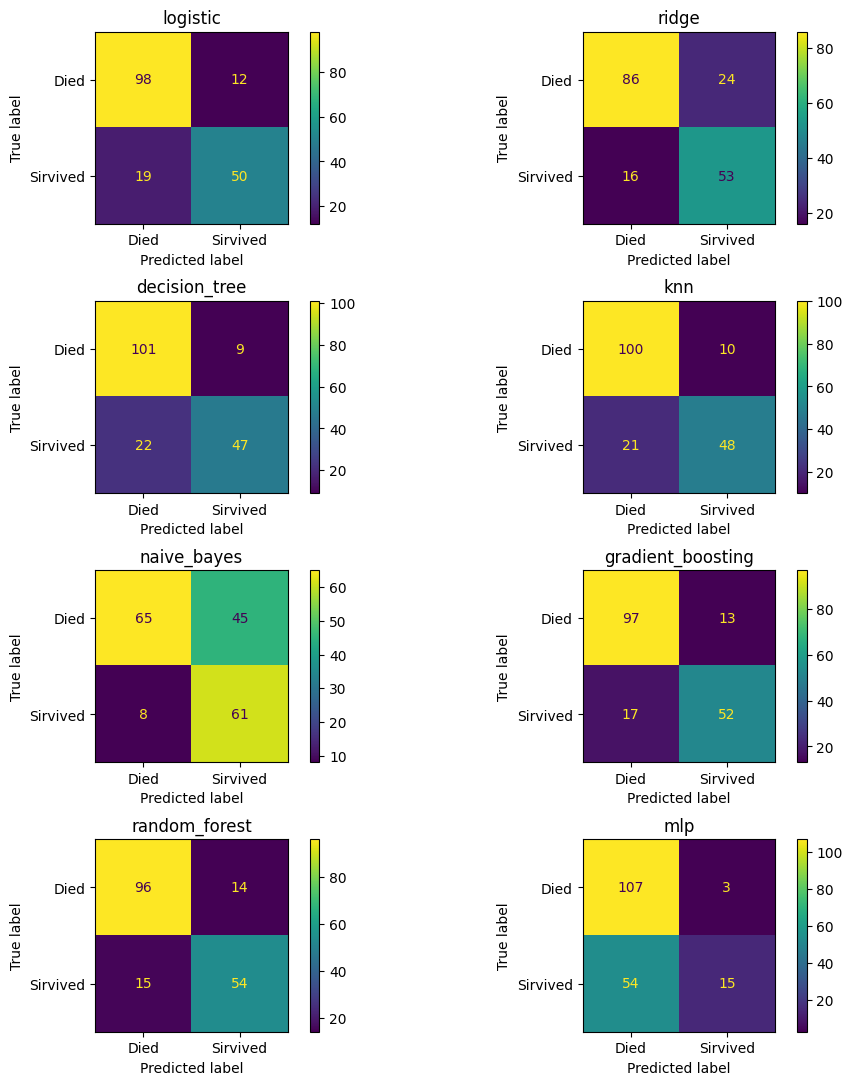

In [103]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

_, ax = plt.subplots(int(len(class_models) / 2), 2, figsize=(12, 10), sharex=False, sharey=False)
for index, key in enumerate(class_models.keys()):
    c_matrix = class_models[key]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Died", "Sirvived"]
    ).plot(ax=ax.flat[index])
    disp.ax_.set_title(key)

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.1)
plt.show()

Точность, полнота, верность (аккуратность), F-мера

In [43]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
]
class_metrics.sort_values(
    by="Accuracy_test", ascending=False
).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1_train,F1_test
random_forest,0.894340,0.794118,0.868132,0.782609,0.910112,0.837989,0.881041,0.788321
gradient_boosting,0.889764,0.800000,0.827839,0.753623,0.894663,0.832402,0.857685,0.776119
logistic,0.751880,0.806452,0.732601,0.724638,0.804775,0.826816,0.742115,0.763359
decision_tree,0.852459,0.839286,0.761905,0.681159,0.858146,0.826816,0.804642,0.752000
knn,0.829167,0.827586,0.728938,0.695652,0.838483,0.826816,0.775828,0.755906
ridge,0.720395,0.688312,0.802198,0.768116,0.804775,0.776536,0.759099,0.726027
naive_bayes,0.554524,0.575472,0.875458,0.884058,0.682584,0.703911,0.678977,0.697143
mlp,0.900000,0.833333,0.197802,0.217391,0.683989,0.681564,0.324324,0.344828


ROC-кривая, каппа Коэна, коэффициент корреляции Мэтьюса

In [44]:
class_metrics = pd.DataFrame.from_dict(class_models, "index")[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
]
class_metrics.sort_values(by="ROC_AUC_test", ascending=False).style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

,Accuracy_test,F1_test,ROC_AUC_test,Cohen_kappa_test,MCC_test
random_forest,0.837989,0.788321,0.858893,0.657111,0.657157
logistic,0.826816,0.763359,0.854084,0.627409,0.629641
ridge,0.776536,0.726027,0.851054,0.538303,0.540613
gradient_boosting,0.832402,0.776119,0.850922,0.642381,0.643113
knn,0.826816,0.755906,0.838735,0.623260,0.628905
decision_tree,0.826816,0.752000,0.794137,0.621151,0.629142
naive_bayes,0.703911,0.697143,0.785903,0.431814,0.470403
mlp,0.681564,0.344828,0.712714,0.220490,0.307678


In [45]:
best_model = str(class_metrics.sort_values(by="MCC_test", ascending=False).iloc[0].name)

display(best_model)

'random_forest'

#### Вывод данных с ошибкой предсказания для оценки

In [94]:
preprocessing_result = pipeline_end.transform(X_test)
preprocessed_df = pd.DataFrame(
    preprocessing_result,
    columns=pipeline_end.get_feature_names_out(),
)

y_pred = class_models[best_model]["preds"]

error_index = y_test[y_test["Survived"] != y_pred].index.tolist()
display(f"Error items count: {len(error_index)}")

error_predicted = pd.Series(y_pred, index=y_test.index).loc[error_index]
error_df = X_test.loc[error_index].copy()
error_df.insert(loc=1, column="Predicted", value=error_predicted)
error_df.sort_index()

'Error items count: 29'

,Survived,Predicted,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
26,1,0,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
72,0,1,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S
103,0,1,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
108,1,0,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
128,1,0,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
193,1,0,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S
241,0,1,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C
272,1,0,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
293,0,1,2,"Levy, Mr. Rene Jacques",male,36.0,0,0,SC/Paris 2163,12.8750,D,C


#### Пример использования обученной модели (конвейера) для предсказания

In [49]:
model = class_models[best_model]["pipeline"]

example_id = 450
test = pd.DataFrame(X_test.loc[example_id, :]).T
test_preprocessed = pd.DataFrame(preprocessed_df.loc[example_id, :]).T
display(test)
display(test_preprocessed)
result_proba = model.predict_proba(test)[0]
result = model.predict(test)[0]
real = int(y_test.loc[example_id].values[0])
display(f"predicted: {result} (proba: {result_proba})")
display(f"real: {real}")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5,C104,S


,Cabin_type_B,Cabin_type_C,Cabin_type_D,Cabin_type_E,Cabin_type_F,Cabin_type_G,Cabin_type_T,Cabin_type_u,Is_married,Pclass,Age,SibSp,Sex_male
450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.580088,1.749939,-0.473465,1.0


'predicted: 0 (proba: [0.91145747 0.08854253])'

'real: 1'

#### Подбор гиперпараметров методом поиска по сетке

https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [89]:
from sklearn.model_selection import GridSearchCV

optimized_model_type = "random_forest"

random_forest_model = class_models[optimized_model_type]["pipeline"]

param_grid = {
    "model__n_estimators": [10, 20, 30, 40, 50, 100, 150, 200, 250, 500],
    "model__max_features": ["sqrt", "log2", 2],
    "model__max_depth": [2, 3, 4, 5, 6, 7, 8, 9 ,10],
    "model__criterion": ["gini", "entropy", "log_loss"],
}

gs_optomizer = GridSearchCV(
    estimator=random_forest_model, param_grid=param_grid, n_jobs=-1
)
gs_optomizer.fit(X_train, y_train.values.ravel())
gs_optomizer.best_params_

{'model__criterion': 'gini',
 'model__max_depth': 7,
 'model__max_features': 'sqrt',
 'model__n_estimators': 30}

Обучение модели с новыми гиперпараметрами

In [90]:
optimized_model = ensemble.RandomForestClassifier(
    random_state=random_state,
    criterion="gini",
    max_depth=7,
    max_features="sqrt",
    n_estimators=30,
)

result = {}

result["pipeline"] = Pipeline([("pipeline", pipeline_end), ("model", optimized_model)]).fit(X_train, y_train.values.ravel())
result["train_preds"] = result["pipeline"].predict(X_train)
result["probs"] = result["pipeline"].predict_proba(X_test)[:, 1]
result["preds"] = np.where(result["probs"] > 0.5, 1, 0)

result["Precision_train"] = metrics.precision_score(y_train, result["train_preds"])
result["Precision_test"] = metrics.precision_score(y_test, result["preds"])
result["Recall_train"] = metrics.recall_score(y_train, result["train_preds"])
result["Recall_test"] = metrics.recall_score(y_test, result["preds"])
result["Accuracy_train"] = metrics.accuracy_score(y_train, result["train_preds"])
result["Accuracy_test"] = metrics.accuracy_score(y_test, result["preds"])
result["ROC_AUC_test"] = metrics.roc_auc_score(y_test, result["probs"])
result["F1_train"] = metrics.f1_score(y_train, result["train_preds"])
result["F1_test"] = metrics.f1_score(y_test, result["preds"])
result["MCC_test"] = metrics.matthews_corrcoef(y_test, result["preds"])
result["Cohen_kappa_test"] = metrics.cohen_kappa_score(y_test, result["preds"])
result["Confusion_matrix"] = metrics.confusion_matrix(y_test, result["preds"])

Формирование данных для оценки старой и новой версии модели

In [98]:
optimized_metrics = pd.DataFrame(columns=list(result.keys()))
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=class_models[optimized_model_type]
)
optimized_metrics.loc[len(optimized_metrics)] = pd.Series(
    data=result
)
optimized_metrics.insert(loc=0, column="Name", value=["Old", "New"])
optimized_metrics = optimized_metrics.set_index("Name")

Оценка параметров старой и новой модели

In [99]:
optimized_metrics[
    [
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
        "Accuracy_train",
        "Accuracy_test",
        "F1_train",
        "F1_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=["Accuracy_train", "Accuracy_test", "F1_train", "F1_test"],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Precision_train",
        "Precision_test",
        "Recall_train",
        "Recall_test",
    ],
)

,Precision_train,Precision_test,Recall_train,Recall_test,Accuracy_train,Accuracy_test,F1_train,F1_test
Name,,,,,,,,
Old,0.894340,0.794118,0.868132,0.782609,0.910112,0.837989,0.881041,0.788321
New,0.867220,0.822581,0.765568,0.739130,0.865169,0.837989,0.813230,0.778626


In [100]:
optimized_metrics[
    [
        "Accuracy_test",
        "F1_test",
        "ROC_AUC_test",
        "Cohen_kappa_test",
        "MCC_test",
    ]
].style.background_gradient(
    cmap="plasma",
    low=0.3,
    high=1,
    subset=[
        "ROC_AUC_test",
        "MCC_test",
        "Cohen_kappa_test",
    ],
).background_gradient(
    cmap="viridis",
    low=1,
    high=0.3,
    subset=[
        "Accuracy_test",
        "F1_test",
    ],
)

,Accuracy_test,F1_test,ROC_AUC_test,Cohen_kappa_test,MCC_test
Name,,,,,
Old,0.837989,0.788321,0.858893,0.657111,0.657157
New,0.837989,0.778626,0.859750,0.651447,0.653765


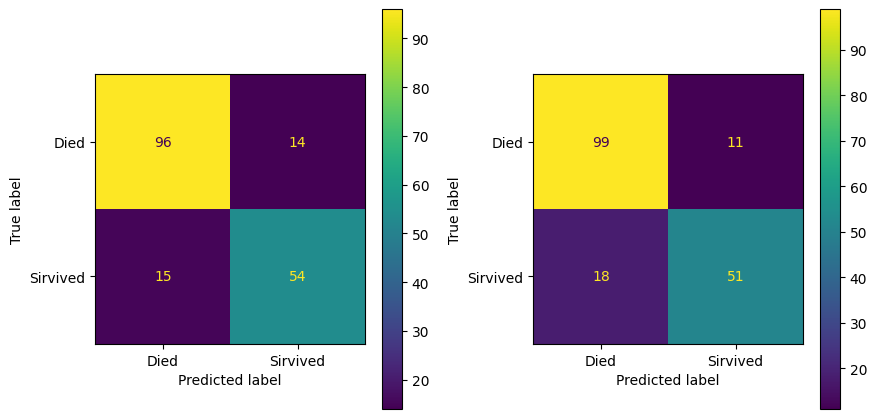

In [104]:
_, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=False, sharey=False
)

for index in range(0, len(optimized_metrics)):
    c_matrix = optimized_metrics.iloc[index]["Confusion_matrix"]
    disp = ConfusionMatrixDisplay(
        confusion_matrix=c_matrix, display_labels=["Died", "Sirvived"]
    ).plot(ax=ax.flat[index])

plt.subplots_adjust(top=1, bottom=0, hspace=0.4, wspace=0.3)
plt.show()